<a id="TOP"> </a>
<div class="alert alert-block alert-info">
</div>

***
[__--TOP--__](#TOP)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wrangle_mvp import clean_zillow
from wrangle_mvp import boxplots, hists, split_data_continuous, model_sets
from wrangle_mvp import get_models
import seaborn as sns

In [2]:
import plotly.express as px

In [25]:
from scipy.stats import pearsonr, spearmanr

In [3]:
df = clean_zillow()

Number of observations removed: 5516


In [4]:
df = df.reset_index()
df

,index,beds,baths,area,tax_value
0,1,2.0,1.0,1465.0,464000.0
1,2,3.0,2.0,1243.0,564778.0
2,3,4.0,3.0,2376.0,145143.0
3,4,4.0,3.0,2962.0,773303.0
4,6,4.0,3.0,3039.0,220583.0
...,...,...,...,...,...
35843,52269,3.0,2.0,1472.0,603333.0
35844,52272,4.0,3.0,2068.0,332251.0
35845,52274,4.0,2.0,1633.0,346534.0
35846,52275,2.0,2.0,1286.0,354621.0


In [6]:
df.index.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [11]:
df = df.drop(columns='index')
df

,beds,baths,area,tax_value
0,2.0,1.0,1465.0,464000.0
1,3.0,2.0,1243.0,564778.0
2,4.0,3.0,2376.0,145143.0
3,4.0,3.0,2962.0,773303.0
4,4.0,3.0,3039.0,220583.0
...,...,...,...,...
35843,3.0,2.0,1472.0,603333.0
35844,4.0,3.0,2068.0,332251.0
35845,4.0,2.0,1633.0,346534.0
35846,2.0,2.0,1286.0,354621.0


In [ ]:
df

In [12]:
train, validate, test = split_data_continuous(df, with_baseline=True)

Prepared df: (35848, 4)

Train: (21508, 4)
Validate: (7170, 4)
Test: (7170, 4)
The mean_preds had the lowest RMSE: 215859 with an in/out of: 0.999


In [31]:
def boxplots(df, excluding=False):
    '''
    
    '''
    
    cols = [col for col in df.columns if col not in [excluding]]

    plt.figure(figsize=(16, 20))
    for i, col in enumerate(cols):

        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1 

        # Create subplot.
        plt.subplot(1, len(cols), plot_number)

        # Title with column name.
        plt.title(col)

        # Display boxplot for column.
        sns.boxplot(data=df[col])

        # Hide gridlines.
        plt.grid(False)

    plt.show()

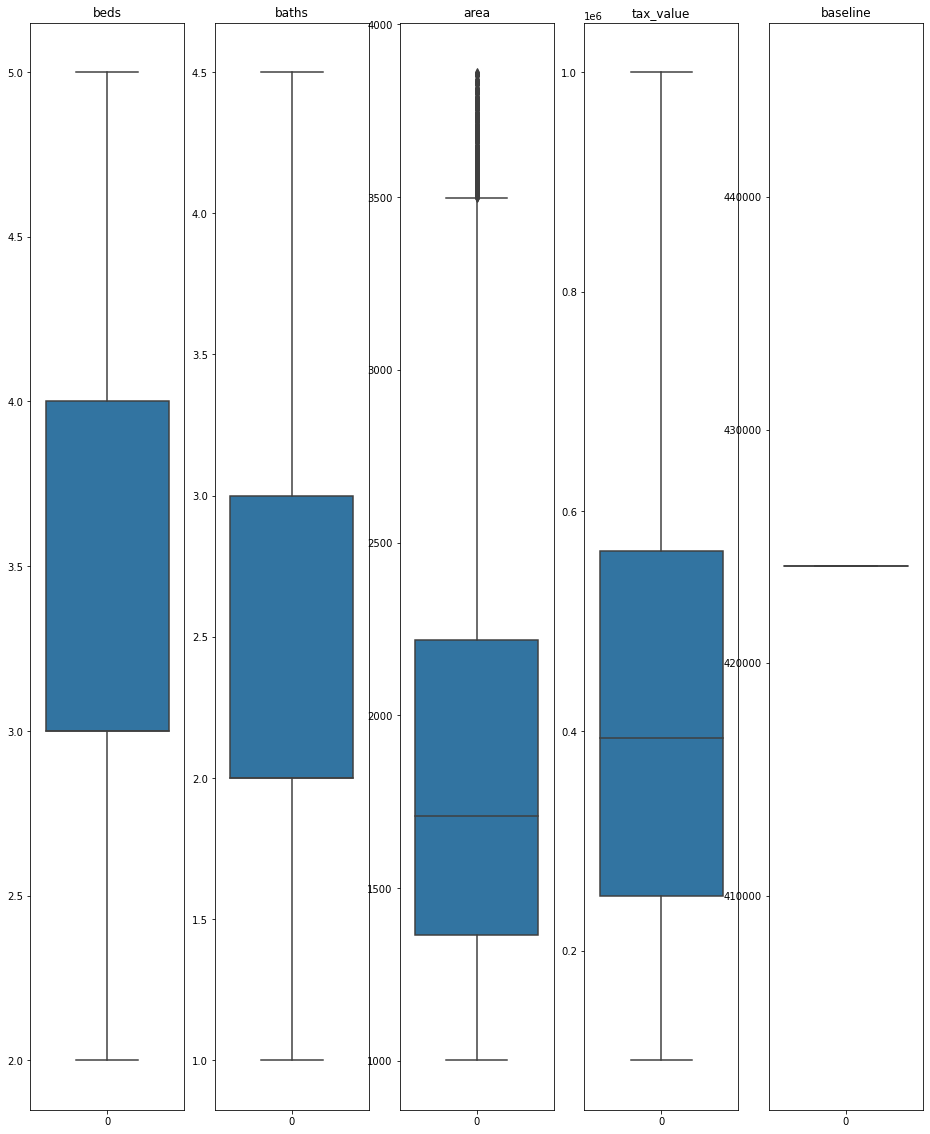

In [13]:
boxplots(train)

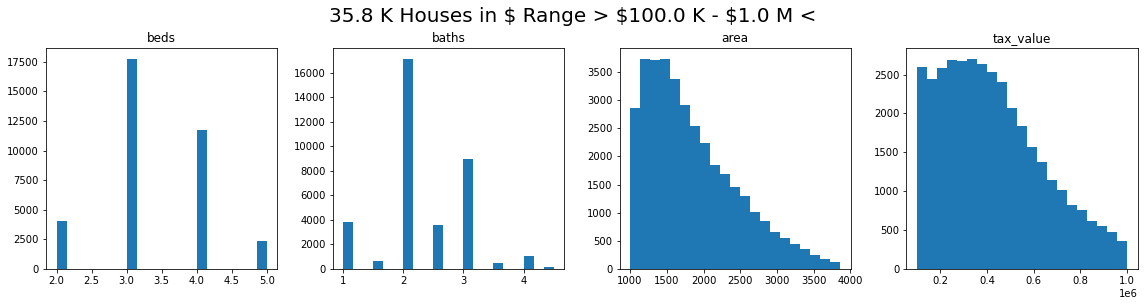

In [14]:
hists(df, granularity=21)

# It seems clear that neither Area, Tax value, nor Baths are normally ditributed, beds almost might be?

<br><br>
<a id="TOP"> </a>
<div class="alert alert-block alert-info">
</div>

***

## Q: Is there a relationship between number of Bedrooms and Tax value?

## Hypothesis

### - ${H_0}$: There is no linear correlation between number of Bedrooms and Tax Value
### - ${H_a}$: There is a linear correlation between number of Bedrooms and Tax Value

In [16]:
# create the correlation matrix using pandas .corr()
zill_corr = train.corr()

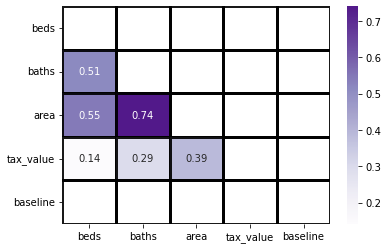

In [18]:
# pass my correlation matrix to a heatmap
kwargs = {'alpha':.9,
          'linewidth':3, 
          'linestyle':'-',
          'linecolor':'black'}

sns.heatmap(zill_corr, cmap='Purples', annot=True,
           mask=np.triu(zill_corr), **kwargs)
plt.show()

### It looks like tax value has a minimal relation to beds, a little more to baths, and a little more to area which tops out at 39% and doesn't give us much

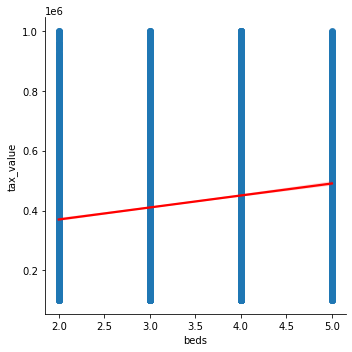

In [20]:
sns.lmplot(data=train, x='beds', y= 'tax_value', line_kws={'color':'red'})
plt.show()

### Test Hypothesis

In [26]:
# Since my variables are not normally distributed, 
# use scipy stats function spearmanr to calculate correlation and p-value 
r, p_value = spearmanr(train.beds, train.tax_value)

In [27]:
print(f'Correlation Coefficient by Spearman Test: {r}\np-value: {p_value}')

Correlation Coefficient by Spearman Test: 0.13396033900853327
p-value: 1.1020137436135083e-86


In [28]:
# set alpha : 0.05
if p_value < 0.05:
    print('We can reject the null hypothesis')
else:
    print('we cannot reject the null hypothesis')

We can reject the null hypothesis


#### Heatmap Takeaways

- Although all of the beds baths and are seem to be postively correlated, none of them is to a high degree, as such, this data alone isn't likely to yield very positive results.
- Based on my correlation coefficient and my p-value, **I reject my Null hypothesis that there is no correlation between `beds` and `tax_value`.**
- Looking at the correlation between our independent variables, they also have higher positive correlations with each other, multicollinearity. This informs me that I don't want to use all of them together in a linear regression model.

<a id="TOP"> </a>
<div class="alert alert-block alert-info">
</div>

***

## Q: Is there a relationship between number of Bathrooms and Tax value?

## Hypothesis

### - ${H_0}$: There is no linear correlation between number of Bathrooms and Tax Value
### - ${H_a}$: There is a linear correlation between number of Bathrooms and Tax Value

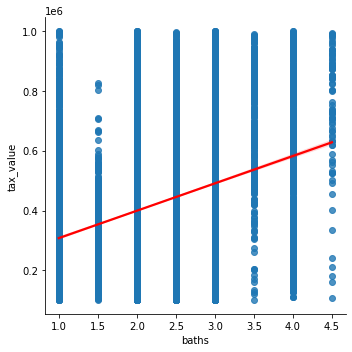

In [31]:
sns.lmplot(data=train, x='baths', y= 'tax_value', line_kws={'color':'red'})
plt.show()

### Test Hypothesis

In [32]:
# Since my variables are not normally distributed, 
# use scipy stats function spearmanr to calculate correlation and p-value 
r, p_value = spearmanr(train.baths, train.tax_value)

In [33]:
print(f'Correlation Coefficient by Spearman Test: {r}\np-value: {p_value}')

Correlation Coefficient by Spearman Test: 0.28052191116331116
p-value: 0.0


In [34]:
# set alpha : 0.05
if p_value < 0.05:
    print('We can reject the null hypothesis')
else:
    print('we cannot reject the null hypothesis')

We can reject the null hypothesis


<a id="TOP"> </a>
<div class="alert alert-block alert-info">
</div>

***

## Q: Is there a relationship between Area and Tax value?

## Hypothesis

### - ${H_0}$: There is no linear correlation between Area and Tax Value

### - ${H_a}$: There is a linear correlation between Area and Tax Value

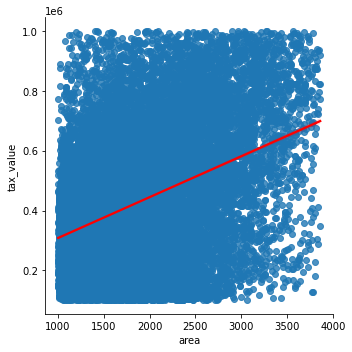

In [35]:
sns.lmplot(data=train, x='area', y= 'tax_value', line_kws={'color':'red'})
plt.show()

### Test Hypothesis

In [36]:
# Since my variables are not normally distributed, 
# use scipy stats function spearmanr to calculate correlation and p-value 
r, p_value = spearmanr(train.area, train.tax_value)

In [37]:
print(f'Correlation Coefficient by Spearman Test: {r}\np-value: {p_value}')

Correlation Coefficient by Spearman Test: 0.3384438057695835
p-value: 0.0


In [38]:
# set alpha : 0.05
if p_value < 0.05:
    print('We can reject the null hypothesis')
else:
    print('we cannot reject the null hypothesis')

We can reject the null hypothesis


### It seems that there is a correlation between all of the variables we have for features. However, as seen in the heatmap, the statistical testing, and the individual plots the amount of correlation is hardly enough for us to make any realistic infrence from these.

### We will have to see if there's much of a decrease in error from the baseline predictions...

# Final Cell
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>